In [31]:
%matplotlib inline

In [32]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts
import os

In [33]:
city_data_to_load = os.path.join('Resources','city_data.csv')
ride_data_to_load = os.path.join('Resources','ride_data.csv') 

In [34]:
# Read the city data file and store it in a pandas DataFrame.

city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [35]:
# Read the ride data file and store it in a pandas DataFrame.

ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [36]:
# Number of nulls

city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [37]:
# Number of nulls

ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [38]:
# Data types each column

city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [39]:
# Data types each column

ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [40]:
# Get the unique values of the type of city.

city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [41]:
# Get the number of data points from the Urban cities.

sum(city_data_df["type"]=="Urban")
sum(city_data_df["type"]=="Suburban")
#sum(city_data_df["type"]=="Rural")

36

In [42]:
pyber_data_df = pd.merge(ride_data_df,city_data_df,on=['city','city'],how='left')
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [43]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [44]:
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban
...,...,...,...,...,...,...
2245,West Hannah,2019-03-02 17:06:03,13.92,7388937249208,12,Suburban
2246,Lake Robertside,2019-04-03 03:27:45,12.76,1301757653884,4,Suburban
2247,Colemanland,2019-01-10 06:49:58,27.70,8704067171414,23,Suburban
2248,East Marymouth,2019-02-12 23:18:53,47.41,7409660239158,5,Suburban


In [45]:
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


# Ride Count per city and type

In [46]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()


city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [47]:
# Create the suburban and rural ride count.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

# Average Fare by city and type

In [48]:
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']

suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']

rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']

# Average number of drivers by city and type

In [49]:
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']

suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']

rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']

# Scatter Plots

## Urban Scatter

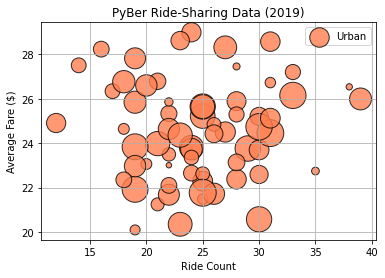

In [50]:
plt.scatter(urban_ride_count,
    urban_avg_fare,
    s= 10*urban_driver_count,
    color='coral',
    edgecolor='black',
    linewidths=1,
    alpha=0.8,
    label='Urban')

plt.title('PyBer Ride-Sharing Data (2019)')

plt.ylabel('Average Fare ($)')

plt.xlabel('Ride Count')

plt.grid(True)

plt.legend()

## Suburban Scatter

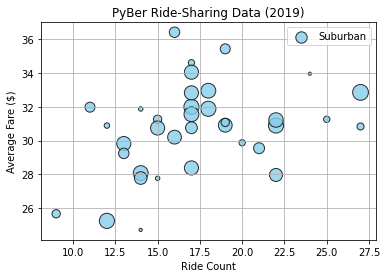

In [51]:
plt.scatter(suburban_ride_count,
    suburban_avg_fare,
    s= 10*suburban_driver_count,
    color='skyblue',
    edgecolor='black',
    linewidths=1,
    alpha=0.8,
    label='Suburban')

plt.title('PyBer Ride-Sharing Data (2019)')

plt.ylabel('Average Fare ($)')

plt.xlabel('Ride Count')

plt.grid(True)

plt.legend()

## Rural Scatter

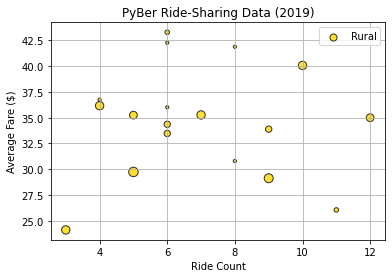

In [52]:
plt.scatter(rural_ride_count,
    rural_avg_fare,
    s= 10*rural_driver_count,
    color='gold',
    edgecolor='black',
    linewidths=1,
    alpha=0.8,
    label='Rural')

plt.title('PyBer Ride-Sharing Data (2019)')

plt.ylabel('Average Fare ($)')

plt.xlabel('Ride Count')

plt.grid(True)

plt.legend()

## Combination Scatter

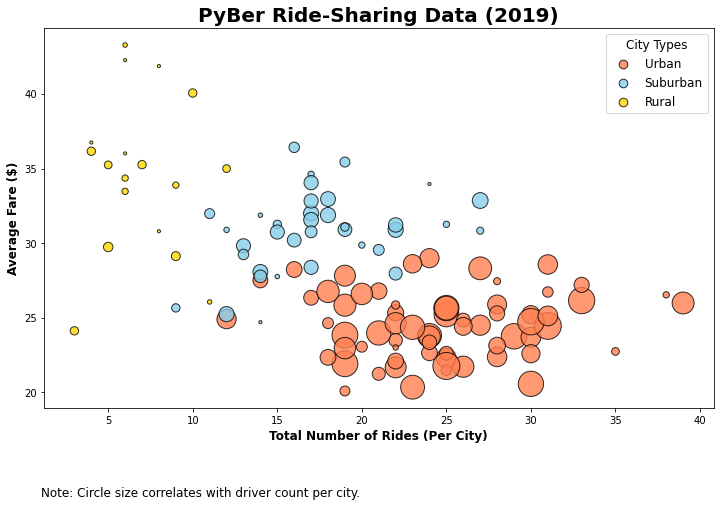

In [89]:

plt.subplots(figsize=(12,7))

plt.scatter(urban_ride_count,
    urban_avg_fare,
    s= 10*urban_driver_count,
    color='coral',
    edgecolor='black',
    linewidths=1,
    alpha=0.8,
    label='Urban')

plt.scatter(suburban_ride_count,
    suburban_avg_fare,
    s= 10*suburban_driver_count,
    color='skyblue',
    edgecolor='black',
    linewidths=1,
    alpha=0.8,
    label='Suburban')

plt.scatter(rural_ride_count,
    rural_avg_fare,
    s= 10*rural_driver_count,
    color='gold',
    edgecolor='black',
    linewidths=1,
    alpha=0.8,
    label='Rural')

plt.ylabel('Average Fare ($)',fontsize = 12,fontweight='bold')
plt.xlabel('Total Number of Rides (Per City)',fontsize=12,fontweight='bold')

plt.title('PyBer Ride-Sharing Data (2019)',fontsize=20,fontweight='bold')

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

plt.text(1,13, "Note: Circle size correlates with driver count per city.", fontsize="12")

plt.savefig('Analysis/Fig1.png')

plt.show()

# Statistics

In [54]:
# Get urban ride summary statistics.
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [55]:
# Get suburban ride summary statistics.
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [56]:
# Get rural ride summary statistics.
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [57]:
# Calculate the mean of the ride count for each city type.

round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [58]:
# Calculate the median of the ride count for each city type.

round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [59]:
# Calculate the mode of the ride count for each city type.

round(urban_ride_count.mode(),2), round(suburban_ride_count.mode(),2), round(rural_ride_count.mode(),2)

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [62]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [63]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [64]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


## Stats on fare for each city type

In [65]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [66]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [67]:
# Get the fares for the suburban cities.
suburban_fares = suburban_cities_df["fare"]
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [68]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [69]:
# Get the fares for the rural cities.
rural_fares = rural_cities_df["fare"]
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [70]:
# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


## Stats on driver count for each city type

In [71]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [72]:
# Get the driver count data from the suburban cities.
suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [73]:
# Get the driver count data from the rural cities.
rural_drivers = rural_cities_df['driver_count']
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [79]:
# Calculate the measures of central tendency for the driver count for the urban cities.
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean driver count for urban trips is {mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median driver count for urban trips is {median_urban_drivers:.2f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode driver count for urban trips is {mode_urban_drivers}.")

The mean driver count for urban trips is 36.68.
The median driver count for urban trips is 37.00.
The mode driver count for urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [80]:
# Calculate the measures of central tendency for the driver count for the suburban_ cities.
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean driver count for suburban trips is {mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median driver count for suburban trips is {median_suburban_drivers:.2f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode driver count for suburban trips is {mode_suburban_drivers}.")

The mean driver count for suburban trips is 13.71.
The median driver count for suburban trips is 16.00.
The mode driver count for suburban trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [81]:
# Calculate the measures of central tendency for the driver count for the rural cities.
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean driver count for rural trips is {mean_rural_drivers:.2f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median driver count for rural trips is {median_rural_drivers:.2f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode driver count for rural trips is {mode_rural_drivers}.")

The mean driver count for rural trips is 4.30.
The median driver count for rural trips is 4.00.
The mode driver count for rural trips is ModeResult(mode=array([1], dtype=int64), count=array([32])).


# Box and Whisker plotting

## Ride Count B/W

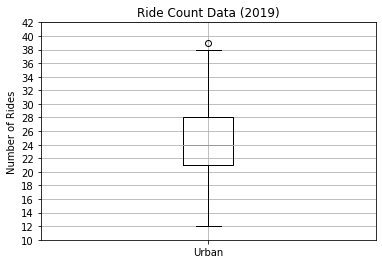

In [84]:
# Box plot for urban cities

x_labels = ['Urban']

fig, ax = plt.subplots()

ax.boxplot(urban_ride_count,labels=x_labels)

# Add title and y-axis labels and grid

ax.set_title('Ride Count Data (2019)')

ax.set_ylabel('Number of Rides')

ax.set_yticks(np.arange(10,44,step=2.0))

ax.grid()

plt.show()

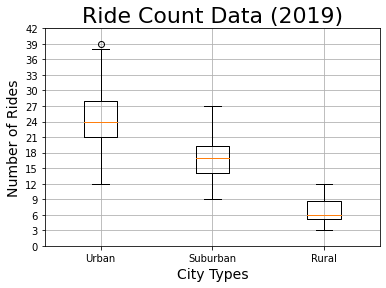

In [86]:
# All in the same boxplot

x_labels = ['Urban','Suburban','Rural']

ride_count_data = [urban_ride_count,suburban_ride_count,rural_ride_count]

fig, ax = plt.subplots()

ax.set_title('Ride Count Data (2019)',fontsize=22)

ax.set_xlabel('City Types',fontsize=14)

ax.set_ylabel('Number of Rides',fontsize=14)

ax.boxplot(ride_count_data,labels=x_labels)

ax.set_yticks(np.arange(0,45,step=3.0))

ax.grid()

# Save figure

plt.savefig('Analysis/Fig2.png')

plt.show()

In [87]:
# Get the city that matches 39.

urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


## Fare Data B/W

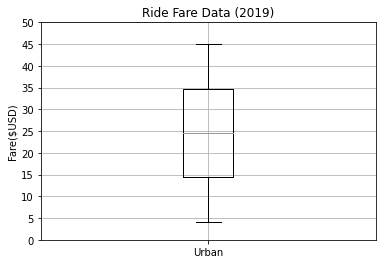

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [88]:
# Create a box-and-whisker plot for the urban fare data.

x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)

# Add the title, y-axis label and grid.

ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

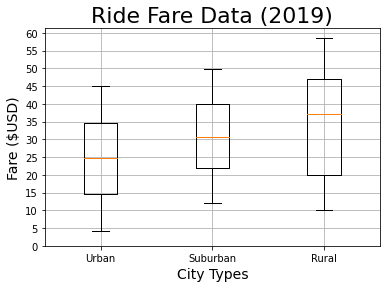

In [95]:
# Create a box-and-whisker plot for the urban fare data.

x_labels = ["Urban",'Suburban','Rural']

fig, ax = plt.subplots()

fare_data = [urban_fares,suburban_fares,rural_fares]

ax.boxplot(fare_data, labels=x_labels)

# Add the title, y-axis label and grid.

ax.set_title('Ride Fare Data (2019)', fontsize = 22)

ax.set_xlabel('City Types',fontsize=14)

ax.set_ylabel('Fare ($USD)', fontsize = 14)

ax.set_yticks(np.arange(0, 65, step=5.0))

ax.grid()

plt.savefig('Analysis/Fig3.png')

plt.show()

## Driver Count Data B/W

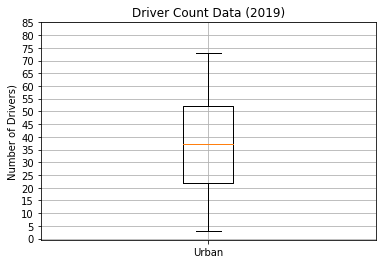

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [96]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

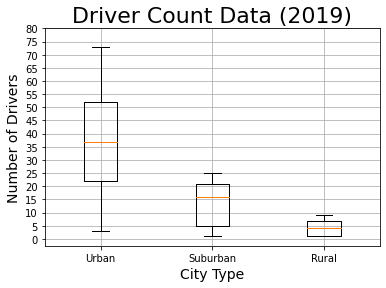

In [102]:
x_labels=['Urban','Suburban','Rural']

driver_count_data = [urban_drivers,suburban_drivers,rural_drivers]

fig, ax = plt.subplots()

ax.boxplot(driver_count_data,labels=x_labels)

ax.set_ylabel('Number of Drivers',fontsize=14)

ax.set_xlabel('City Type',fontsize=14)

ax.set_title('Driver Count Data (2019)',fontsize=22)

ax.grid()

ax.set_yticks(np.arange(0,85,step=5.0))

plt.savefig('Analysis/Fig4.png')

plt.show()

# Pie Chart

## Fare % Pie Chart

In [103]:
sum_fares_by_type = pyber_data_df.groupby('type').sum()['fare']

sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [104]:
total_fares = pyber_data_df['fare'].sum()

total_fares

63538.64

In [105]:
type_percents = 100 * sum_fares_by_type / total_fares

type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

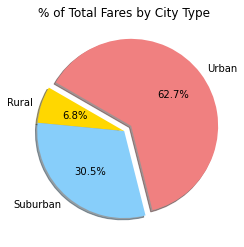

In [115]:
import matplotlib as mlp

plt.pie(type_percents,
        labels=['Rural','Suburban','Urban'],
        colors=['gold','lightskyblue','lightcoral'],
        explode=[0,0,.1],
        autopct='%1.1f%%',
        shadow=True,startangle=150)

plt.title('% of Total Fares by City Type')

mlp.rcParams['font.size'] = 14

plt.savefig('Analysis/Fig5.png')

plt.show()

## 